In [28]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import ipywidgets

In [29]:
col_names=['x1','x2','x3','x4']
df = pd.read_csv('PCA.csv', 
                 sep=",", 
                 skiprows=1,
                 names=col_names)

- a) Plot the time series for each variable. [1 point for the plot(s)] 
- b) Perform PCA on the data. [1 point for correct size of input data and correct output of PCA] 
- c) Find which modes you want to keep in order to reconstruct the data and provide a rationale for your selection. [1 point for the choice of modes and 1 point for the rationale]. 
- d) Plot the PCs of the significant modes (i.e. those that you kept) in time. Briefly discuss the results (what are these plots telling you?) [1 point for the plot(s) and 1 point for the discussion.] 
- e) Plot PC1 vs PC2.  Discuss any feature that you find interesting.  [1 point for the plot, 1 point for the discussion.] 
 

### Plot the time series for each variable

[0, 40, -4.5, 4.5]

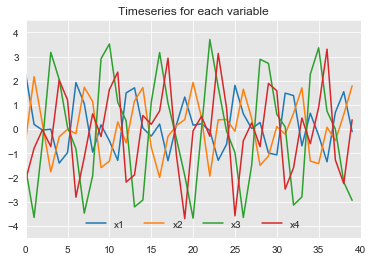

In [30]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = df.plot()
ax.set_title('Timeseries for each variable')
ax.legend(frameon=False, loc='lower center', ncol=len(col_names))
ax.axis([0,40,-4.5,4.5])

###  Perform PCA on the data.

In [31]:
#normalize data and check it out

data_norm = (df - df.mean())/df.std()
data_norm.head()

,x1,x2,x3,x4
0,2.054100,-0.416833,-0.640717,-1.130501
1,0.035178,1.840631,-1.503714,-0.388076
2,-0.190631,0.153166,-0.193946,0.049160
3,-0.156576,-1.577842,1.403164,-0.349166
4,-1.516147,-0.318572,0.926750,1.220702


In [35]:
## We want to run PCA
n_modes = np.min(np.shape(data_norm))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

n=2
print(np.sum(fracVar[:n])*100)  #sum of the first n modes = total percent variance explained by the first neigvecs
print(np.shape(eigvecs))

97.61264720571651
(4, 4)


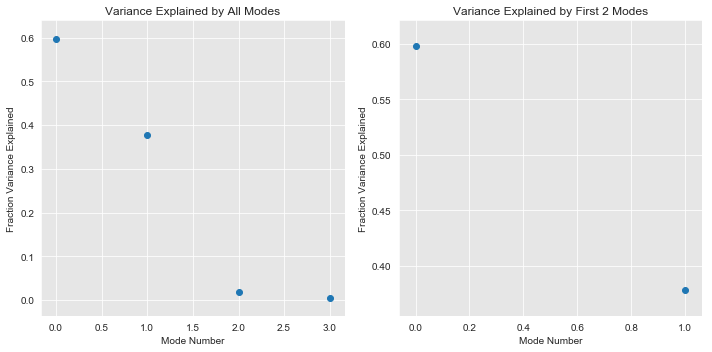

In [36]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')
plt.tight_layout()
plt.show()